In [ ]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


# set matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
spotify = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Deep-Learning/master/Data_Sets/spotify.csv')
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
np.max(spotify.track_popularity)

100

In [ ]:
x = spotify.copy().dropna()  # Dropping all Null Values
y = x.pop('track_popularity')
artists = x['track_artist']

In [ ]:
features_num = ['danceability', 'energy',	'key',	'loudness',	'mode',	'speechiness',
                'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms']
features_cat = ['playlist_genre']

In [ ]:
# Data preprocessing from scikit learn
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

In [ ]:
def group_split(x,y, group, train_size=0.75):
  splitter = GroupShuffleSplit(train_size=train_size)
  train, test = next(splitter.split(x,y,groups=group))
  return (x.iloc[train], x.iloc[test], y.iloc[train], y.iloc[test])

In [ ]:
x_train, x_valid, y_train, y_valid = group_split(x,y,artists)

In [ ]:
x_train = preprocessor.fit_transform(x_train)

In [ ]:
x_valid = preprocessor.transform(x_valid)

In [ ]:
y_train = y_train / 100
y_valid = y_valid / 100

In [ ]:
input_shape = [x_train.shape[1]]
print('Input shape: {}'.format(input_shape))

Input shape: [18]


In [ ]:
model = keras.Sequential([
                          layers.Dense(1, input_shape=input_shape),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    batch_size=512,
                    epochs=50,
                    verbose=0)

minimum validation loss: 0.1993


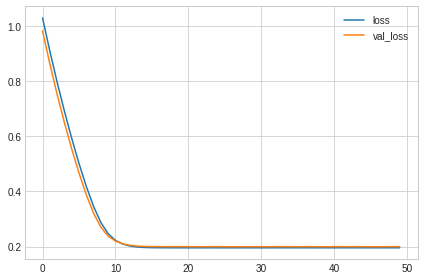

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {:0.4f}'.format(history_df['val_loss'].min()));

In [ ]:
model = keras.Sequential([
                          layers.Dense(128, activation='relu', input_shape=input_shape),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)
                          ])

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'mae'
)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=512,
    epochs=50
)

Epoch 1/50
47/47 [==============================] - 1s 9ms/step - loss: 0.3390 - val_loss: 0.2136
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.2026 - val_loss: 0.2054
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1969 - val_loss: 0.2027
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1940 - val_loss: 0.2033
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1904 - val_loss: 0.2012
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1893 - val_loss: 0.2001
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1860 - val_loss: 0.2000
Epoch 8/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1859 - val_loss: 0.1995
Epoch 9/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1836 - val_loss: 0.1986
Epoch 10/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1845 - val_loss: 0.2002
Epoch 11/50
47/47 [

In [ ]:
model = keras.Sequential([
                          layers.Dense(128, activation='relu', input_shape=input_shape),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)
                          ])
model.compile(
    optimizer='adam',
    loss = 'mae'
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

NameError: ignored